## Loading 2D fields into yt 

`yt_xarray` can also load in 2D fields from xarray into a yt dataset. To do so, all you have to do is provide a selection dictionary that will reduce your chosen field down to 2D. 

First, let's import and create a test dataset with dimensions that yt will not know:

In [1]:
import xarray as xr
import yt_xarray
import yt
import numpy as np
from yt_xarray.sample_data import load_random_xr_data

fields = {'temp': ('x', 'y', 'z'), 
          'precip': ('x', 'y'),
          'precip_t': ('x', 'y', 'time')}
dims = {'x': (0,1,15), 'y': (0, 1, 10), 'z': (0, 1, 15), 'time': (0, 1, 5)}
ds = load_random_xr_data(fields, dims, length_unit='m')
ds

<xarray.Dataset>
Dimensions:   (x: 15, y: 10, z: 15, time: 5)
Coordinates:
  * x         (x) float64 0.0 0.07143 0.1429 0.2143 ... 0.7857 0.8571 0.9286 1.0
  * y         (y) float64 0.0 0.1111 0.2222 0.3333 ... 0.6667 0.7778 0.8889 1.0
  * z         (z) float64 0.0 0.07143 0.1429 0.2143 ... 0.7857 0.8571 0.9286 1.0
  * time      (time) float64 0.0 0.25 0.5 0.75 1.0
Data variables:
    temp      (x, y, z) float64 0.4058 0.4334 0.438 ... 0.7855 0.1842 0.4471
    precip    (x, y) float64 0.3455 0.4061 0.8178 0.1203 ... 0.2593 0.7463 0.941
    precip_t  (x, y, time) float64 0.3186 0.7601 0.7724 ... 0.6708 0.8813 0.1331
Attributes:
    geospatial_vertical_units:  m

loading the `"temp"` field without any selection dictionary will load the full 3D field: 

In [2]:
yt_ds = ds.yt.load_uniform_grid(fields=["temp",], length_unit = 'km')

yt : [INFO     ] 2023-01-12 17:06:33,225 Parameters: current_time              = 0.0
yt : [INFO     ] 2023-01-12 17:06:33,226 Parameters: domain_dimensions         = [15 10 15]
yt : [INFO     ] 2023-01-12 17:06:33,227 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-01-12 17:06:33,228 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2023-01-12 17:06:33,228 Parameters: cosmological_simulation   = 0


Inferred coordinate type is cartesian -- to override, use ds.yt.set_coordinate_type


In [3]:
print(yt_ds.domain_width)

[1. 1. 1.] code_length


loading in the `"precip"` field, which is two dimensional, which load in the field with a dummy 3rd dimension:

In [4]:
yt_ds = ds.yt.load_uniform_grid(fields=["precip",], length_unit = 'km')

yt : [INFO     ] 2023-01-12 17:06:33,282 Parameters: current_time              = 0.0
yt : [INFO     ] 2023-01-12 17:06:33,283 Parameters: domain_dimensions         = [15 10  1]
yt : [INFO     ] 2023-01-12 17:06:33,284 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-01-12 17:06:33,285 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2023-01-12 17:06:33,285 Parameters: cosmological_simulation   = 0


In [5]:
print(yt_ds.domain_width)

[1. 1. 1.] code_length


yt : [INFO     ] 2023-01-12 17:06:33,411 xlim = 0.000000 1.000000
yt : [INFO     ] 2023-01-12 17:06:33,412 ylim = 0.000000 1.000000
yt : [INFO     ] 2023-01-12 17:06:33,412 xlim = 0.000000 1.000000
yt : [INFO     ] 2023-01-12 17:06:33,413 ylim = 0.000000 1.000000
yt : [INFO     ] 2023-01-12 17:06:33,417 Making a fixed resolution buffer of (('stream', 'precip')) 800 by 800



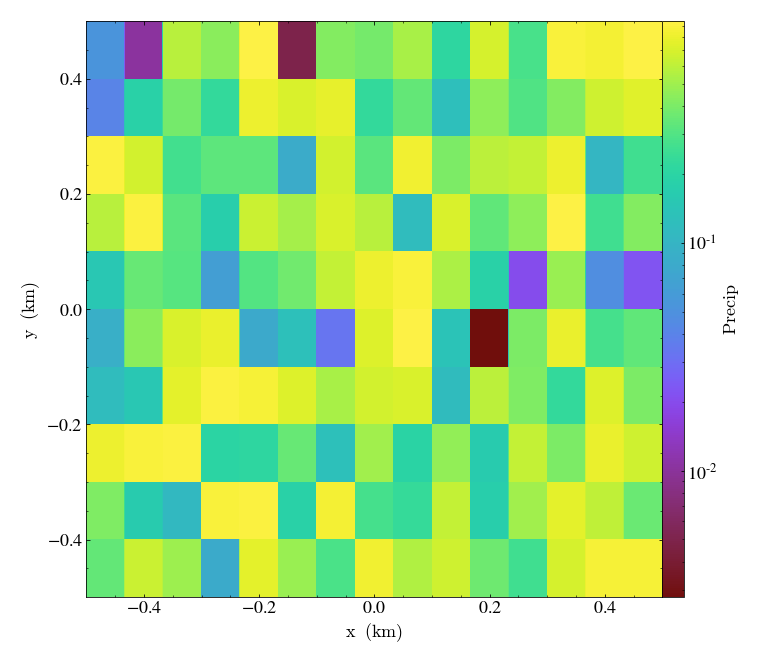

In [6]:
yt.SlicePlot(yt_ds, "z", ("stream", "precip"))

Finally, you can also provide a selection dictionary to reduce a field to 2D. For example, you can load select a timestep to load for `"precip_t"` with:

In [7]:
yt_ds = ds.yt.load_uniform_grid(fields=["precip_t",], length_unit = 'km', geometry="cartesian", sel_dict={'time':0})

yt : [INFO     ] 2023-01-12 17:06:34,002 Parameters: current_time              = 0.0
yt : [INFO     ] 2023-01-12 17:06:34,002 Parameters: domain_dimensions         = [15 10  1]
yt : [INFO     ] 2023-01-12 17:06:34,003 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-01-12 17:06:34,004 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2023-01-12 17:06:34,004 Parameters: cosmological_simulation   = 0


In [8]:
print(yt_ds.domain_width)

[1. 1. 1.] code_length


yt : [INFO     ] 2023-01-12 17:06:34,104 xlim = 0.000000 1.000000
yt : [INFO     ] 2023-01-12 17:06:34,105 ylim = 0.000000 1.000000
yt : [INFO     ] 2023-01-12 17:06:34,105 xlim = 0.000000 1.000000
yt : [INFO     ] 2023-01-12 17:06:34,106 ylim = 0.000000 1.000000
yt : [INFO     ] 2023-01-12 17:06:34,110 Making a fixed resolution buffer of (('stream', 'precip_t')) 800 by 800



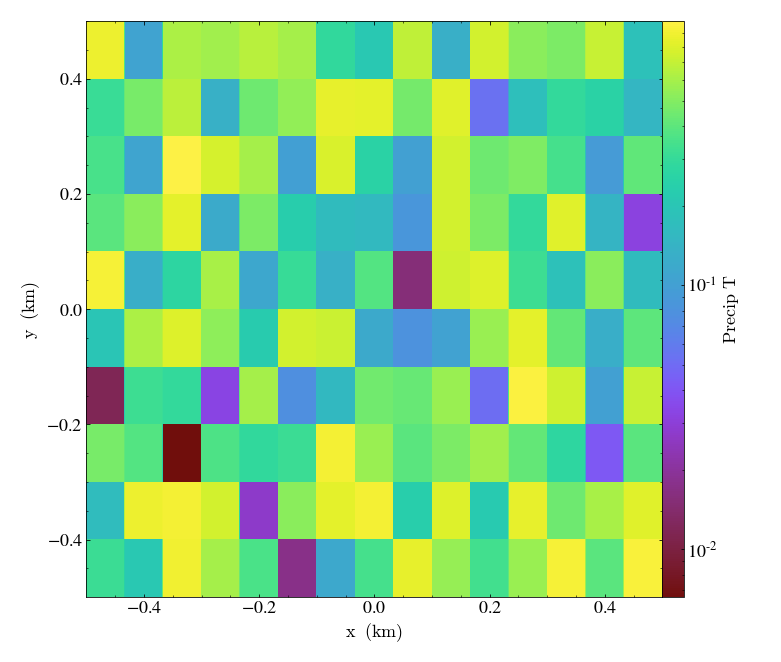

In [9]:
yt.SlicePlot(yt_ds, "z", ("stream", "precip_t"))